<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Module 52</b></font><center>
                <center><font size="6">Wetlands for Livelihood & Conservation</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Notebook</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>Wetland change analysis in Google Earth Engine (GEE)</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='images/ihe-delft-institute_unesco_fc-lr.jpg'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction](#introduction)
3. [Installation of required library](#install)
4. [Initializing the GEE](#initial)
5. [Import data](#import)
6. [Clip and display](#clip)
7. [Compute Area](#area)
8. [Image collection and temporal aggregation](#collection)
9. [Zonal statistics and export](#zonal)
10. [Exercise](#exercise)
11. [References and tutorials](#reference)

# 1. Learning objectives<a name="learningobs"></a>

- To access data from Google Earth Engine (GEE) using Python
- To show metadata
- To import data
- To interactively visualise the imported data
- To clip data to study area, compute landcover area
- To perform temporal, univariate and zonal statistics

# 2. Introduction<a name="introduction"></a>

[Google Earth Engine (GEE)](https://earthengine.google.com/) is a computing platform that allows users to run geospatial analysis on Google's infrastructure. It brings together the world's satellite imagery from multiple sources – Landsat, Sentinel, MODIS etc. along with access to other secondary climatic and Geo-physical datasets covering entire globe. GEE has become very popular in the geospatial community and numerous environmental applications at local, regional, and global scales have been deployed all over the globe. GEE provides both JavaScript and Python APIs for making computational requests to the Earth Engine servers. 

Watch [this video](https://youtu.be/gKGOeTFHnKY) for an overview about GEE and what it can do.

In this module we will use [Geemap](https://geemap.org/), which is a Python package for interactive mapping with Google Earth Engine (GEE). It is built upon ipyleaflet and ipywidgets, and enables users to analyze and visualize Earth Engine datasets interactively within a Jupyter-based environment.

Read below paper about Geemap by the developed Prof. Quisheng Wu. <br>
* Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305
    
<b>Note</b>: You will need a valid login to access GEE. See [this document](docs/Signup_Instructions_GEE.pdf) for instructions to signup.

# 3. Installation of required library<a name="install"></a>
You need to have geemap python library installed in your computer. <br>
If you are using conda environment then use the below command to install geemap. <br>
<b>This is one time step.</b>

In [1]:
#conda install -c conda-forge geemap

<b>OR</b> use pip to install the geemap package as given below

In [2]:
#!pip install --upgrade geemap

In [4]:
#geemap.update_package()

# 4. Initializing the GEE<a name="initial"></a>
Let us start with geemap by importing the library and bringing in a interactive map.

In [1]:
import os
import ee
import geemap
import pandas as pd

Now you will define a interactive map and get it inline in this notebook. <br>
<b> Note that first time you do this step in your computer, it will ask for authorize the access needed by GEE. You have to follow the instructions and finish the authorization. This is only one time in local computer</b> <br>
See this [youtube video](https://www.youtube.com/watch?v=h0pz3S6Tvx0&t=359s) showing the authorization steps.

In [3]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Now that you have successfully initiated the geemap, let us explore data sets from GEE by importing them to this notebook.

# 5. Import data in GEE<a name="import"></a>
GEE offers access to petabytes of data from various data sources primarily from satellites and remote sensing.<br>
You can check [this link](https://developers.google.com/earth-engine/datasets) for the data catalog of GEE.<br>
For each type of data, the catalog gives you <b>"Earthengine snippet"</b> as shown below (only an example) which can be used to access this particular data. <br>
<br>
<img src="images/gee1.png" alt="gee" width="500"/>
<br>
**Let us now create a new instance of interactive Map**


In [5]:
visParamMap = {"min":0,"max":255,"palette":["FEFECC","FAFAC3","F7F7BB","F4F4B3","F1F1AB","EDEDA2","EAEA9A","E7E792","E4E48A","E0E081","DDDD79","DADA71","D7D769","D3D360","D0D058","CDCD50","CACA48","C6C63F","C3C337","C0C02F","BDBD27","B9B91E","B6B616","B3B30E","B0B006","609C60","5C985C","589558","549254","508E50","4C8B4C","488848","448544","408140","3C7E3C","387B38","347834","317431","2D712D","296E29","256B25","216721","1D641D","196119","155E15","115A11","0D570D","095409","065106","643700","643a00","643d00","644000","644300","644600","644900","654c00","654f00","655200","655500","655800","655a00","655d00","656000","656300","666600","666900","666c00","666f00","667200","667500","667800","667b00","ff99ff","FC92FC","F98BF9","F685F6","F37EF3","F077F0","ED71ED","EA6AEA","E763E7","E45DE4","E156E1","DE4FDE","DB49DB","D842D8","D53BD5","D235D2","CF2ECF","CC27CC","C921C9","C61AC6","C313C3","C00DC0","BD06BD","bb00bb","000003","000004","000005","BFC0C0","B7BDC2","AFBBC4","A8B8C6","A0B6C9","99B3CB","91B1CD","89AFD0","82ACD2","7AAAD4","73A7D6","6BA5D9","64A3DB","5CA0DD","549EE0","4D9BE2","4599E4","3E96E6","3694E9","2E92EB","278FED","1F8DF0","188AF2","1088F4","0986F7","55A5A5","53A1A2","519E9F","4F9B9C","4D989A","4B9597","499294","478F91","458B8F","43888C","418589","3F8286","3D7F84","3B7C81","39797E","37767B","357279","336F76","316C73","2F6970","2D666E","2B636B","296068","285D66","bb93b0","B78FAC","B48CA9","B189A6","AE85A2","AA829F","A77F9C","A47B99","A17895","9E7592","9A718F","976E8C","946B88","916885","8D6482","8A617F","875E7B","845A78","815775","7D5472","7A506E","774D6B","744A68","714765","de7cbb","DA77B7","D772B3","D46EAF","D169AB","CE64A8","CB60A4","C85BA0","C4579C","C15298","BE4D95","BB4991","B8448D","B54089","B23B86","AF3682","AB327E","A82D7A","A52976","A22473","9F1F6F","9C1B6B","991667","961264","000000","000000","000000","1964EB","1555E4","1147DD","0E39D6","0A2ACF","071CC8","030EC1","0000BA","0000BA","040464","0000FF","3051cf","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","000000","547FC4","4D77BA","466FB1","4067A7","395F9E","335895","335896","335897","ff2828","ffffff","d0ffff","ffe0d0","ff7d00","fac800","c86400","fff000","afcd96","afcd96","64dcdc","00ffff","00ffff","00ffff","111133","000000"]};

In [6]:
landmask = ee.Image("projects/glad/landBuffer4").mask();
change =ee.Image('projects/glad/GLCLU2020/LCLUC').updateMask(landmask);
m00 = ee.Image('projects/glad/GLCLU2020/LCLUC_2000').updateMask(landmask);
m20 = ee.Image('projects/glad/GLCLU2020/LCLUC_2020').updateMask(landmask);

Map.addLayer(m00, visParamMap, "Land Cover 2000")
Map.addLayer(m20, visParamMap, "Land Cover 2020")

Let us import the Copernicus global land cover map of 2019 and display it in the Map above. See details of [Copernicus global land cover map here](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V-C3_Global)

**GEE Functions used** \
[*ee.Image*](https://developers.google.com/earth-engine/apidocs/ee-image): An object to represent an Earth Engine image. \
[*Map.addLayer*](https://geemap.org/geemap/#geemap.geemap.Map.addLayer): Adds a given EE object to the map as a layer.


In [6]:
left_layer = geemap.ee_tile_layer(m00, visParamMap, name='Hillshade')
right_layer = geemap.ee_tile_layer(m20, visParamMap, name='DEM')

In [10]:
Map = geemap.Map()
Map.split_map('HYBRID', right_layer, left_label='2000', right_label='2020',)
Map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [7]:
change =ee.Image('projects/glad/GLCLU2020/LCLUC').updateMask(landmask);
Map.addLayer(change, visParamMap, "Land Cover Change 2000 - 2020")

In [8]:
Map.draw_features

In [11]:
roi=ee.FeatureCollection(Map.draw_features)
change_roi = change.clip(roi)
Map.addLayer(change_roi, visParamMap, 'Change 2020-2020 ROI')

Let us import the global country boundaries (vector) provided by FAO in GEE and display it in the Map above. See details of [FAO GAUL](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level0)

**GEE Functions used** \
[*ee.FeatureCollection*](https://developers.google.com/earth-engine/apidocs/ee-featurecollection): An object to represent an Earth Engine collection of vector, geometry etc. \
[*Map.addLayer*](https://geemap.org/geemap/#geemap.geemap.Map.addLayer): Adds a given EE object to the map as a layer.

# 6. Clip and display<a name="clip"></a>
GEE offers 'algorithms' to conduct spatial data analysis. The analyses can be performed on the data offered in GEE and also with the user imported data.
Here we are clipping the global landcover map to Kenya and display the country and provinces boundary over the clipped landcover.

**Functions used** \
[*filter*](https://developers.google.com/earth-engine/apidocs/ee-featurecollection-filter): Apply a filter to this collection. \
[*Map.addLayer*](https://geemap.org/geemap/#geemap.geemap.Map.addLayer):  Clips an image to a Geometry or Feature.

Now that we have our Map zoomed into the area of interest and overlayed the boundary of country of interest, let us now clip the global Landcover map to kenya.

**Functions used** \
[*clip*](https://developers.google.com/earth-engine/apidocs/ee-featurecollection-filter): Apply a filter to this collection. \
[*Map.addLayer*](https://geemap.org/geemap/#geemap.geemap.Map.addLayer): Adds a given EE object to the map as a layer.

# 7. Compute Area of each landcover type<a name="area"></a>
In this section, let us compute the area of each landcover type in Kenya in Sq.Km

**Functions used** \
[*image_area_by_group*](https://geemap.org/common/#geemap.common.image_area_by_group): Calculates the area of each class of an image.. \

In [12]:
# Compute area of each land cover type in Sq.Km
df = geemap.image_area_by_group(
    change_roi, groups=None, scale=1000, denominator=1e6, decimal_places=4, verbose=True
)
df

Calculating area for group 124 ...
Calculating area for group 125 ...
Calculating area for group 127 ...
Calculating area for group 128 ...
Calculating area for group 151 ...
Calculating area for group 240 ...
Calculating area for group 246 ...


,area,percentage
group,,
124,1.2348,0.1497
125,1.4763,0.1790
127,1.6555,0.2008
128,0.3389,0.0411
151,0.9582,0.1162
240,2.3060,0.2796
246,0.2766,0.0335


In [13]:
df['class'] = df.index

In [14]:
df.to_csv('file_name2.csv', index=False)

In [15]:
df1 = df.loc[df['class'].astype(int) >= 240]

<AxesSubplot:xlabel='class'>

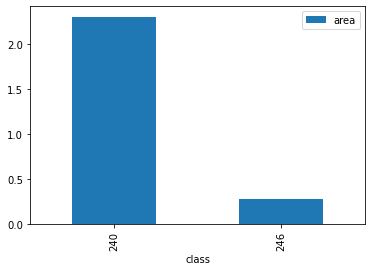

In [16]:
df1.plot.bar(y='area', x='class')


<br>
<img align="left" src="images/change_legend.png" alt="gee" width="400"/>
<br>

# 8. Image collection and temporal aggregation <a name="collection"></a>
In GEE, a stack or time series of images are called Image Collections. GEE offers all time series data related to satellite data, climate, land cover etc as image collections. An ImageCollection can be loaded by pasting an Earth Engine asset ID into the ImageCollection constructor. You can find ImageCollection IDs in the [data catalog](https://developers.google.com/earth-engine/datasets). 
For example, to load the GPM Precipitation data (Rainfall), go to the [product page](https://developers.google.com/earth-engine/datasets/catalog/NASA_GPM_L3_IMERG_MONTHLY_V06) in data catalog and get the asset id given under *Earth Engine Snippet* as shown below.
<br>
<img src="images/gee2.png" alt="gee" width="500"/>
<br>
**Functions used** \
[*ee.ImageCollection*](https://geemap.org/common/#geemap.common.image_area_by_group): Calculates the area of each class of an image. \
[*filterBounds*](https://developers.google.com/earth-engine/apidocs/ee-imagecollection-filterbounds): Shortcut to filter a collection by intersection with geometry. Items in the collection with a footprint that fails to intersect the given geometry will be excluded. \
[*filterDate*](https://developers.google.com/earth-engine/apidocs/ee-imagecollection-filterdate): Shortcut to filter a collection by a date range. \
[select](https://developers.google.com/earth-engine/apidocs/ee-imagecollection-select): Select bands from each image in a collection.
<br>
<br>
**Next, let us bring in monthly GPM precipitation data and filter it to Kenya for the year 2021.** \
**note that the unit is mm/hr**

In [17]:
pcp_monthly = ee.ImageCollection("ECMWF/ERA5/MONTHLY") \
    .select('total_precipitation')

In [18]:
# Function to get annual precip image from monthly precip images per year
def annual(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = start_date.advance(1, 'year')
    
    image = pcp_monthly.select('total_precipitation') \
        .filterBounds(roi) \
        .filterDate(start_date, end_date) \
        .sum()
    stat = geemap.image_mean_value(image, roi, scale=1000)
    return stat

In [19]:
years = ee.List.sequence(1979, 2019)
annualimages = years.map(annual).getInfo()

In [20]:
type(years)

ee.ee_list.List

In [21]:
list = years.getInfo()

In [23]:
df2 = pd.DataFrame(annualimages, columns = ['total_precipitation'])

In [24]:
df2['year'] = list

In [25]:
df2['precip_mm'] = df2['total_precipitation'] * 1000

<AxesSubplot:xlabel='year'>

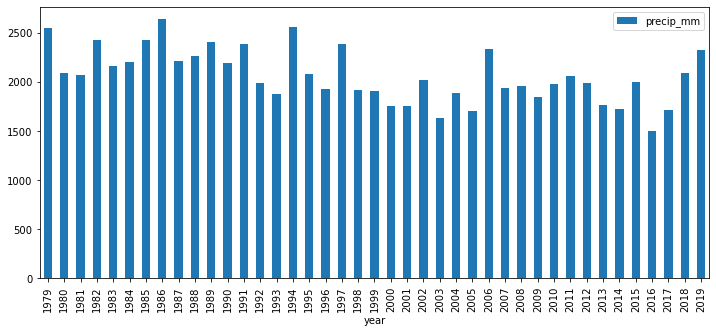

In [27]:
df2.plot.bar(y='precip_mm', x='year', figsize=(12,5))

In the next step we will aggregate the monthly mean precipitation to annual mean and multiply by 8760 (24 * 365 hours in an year) to convert the unit to mm/year. \
Note how two functions can be piped together using '.'
<br>
**Functions used** \
[*mean*](https://developers.google.com/earth-engine/apidocs/ee-imagecollection-mean):  Gets image descriptive statistics. \
[*multiply*](https://developers.google.com/earth-engine/apidocs/ee-image-multiply): Multiplies the first value by the second for each matched pair of bands in image1 and image2. Note this function can be only applied to an image \

Let us now compute the un-variate statistics (mean, minimum, maximum, standard deviation, sum) of the annual precipitation image of Kenya.
<br>
**Functions used** \
[*image_stats*](https://geemap.org/common/#geemap.common.image_stats):  Reduces an image collection by calculating the mean of all values at each pixel across the stack of all matching bands. Bands are matched by name. \
[*getInfo*](https://developers.google.com/earth-engine/apidocs/ee-string-getinfo):  Retrieves the value of this object from the server. \

Let us visualize the annual precipitation. For that we first define a color gradient palette which will vary between min and max value (obtained from last step.)

# 9. Zonal statistics and export image <a name="zonal"></a>
In this section let us extract the descriptive statistics (mean) of annual precipitation for each province in kenya. We will zonal statistics and export the derived statistics into a csv file.
**Functions used** \
[*zonal_statistics*](https://geemap.org/common/#geemap.common.zonal_statistics): Summarizes the values of a raster within the zones of another dataset and exports the results as a csv, shp, json, kml, or kmz. \
[*ee_export_image_to_drive*](https://geemap.org/common/#geemap.common.ee_export_image_to_drive):  Creates a batch task to export an Image as a raster to Google Drive. \

In the final step download the annual precipitation map for kenya to your google drive in geotif format for further analysis in other GIS softwares like QGIS. \
**Note that depending on the area of interest export can take long time to finish**

In [28]:
geemap.ee_export_image_to_drive(
    change_roi, description='lulc_change', folder='gee_output'
)

# 10. Exercise <a name="exercise"></a>
Now that you have learned how to do spatial analysis in GEE, repeat the same steps (in a new notebook) for your own country and compute:
* Area of each land cover type in hectares
* Average annual rainfall for the year 2020 per each province in your country
* Make a nice interactive Map display showing the landcover, annual rainfall, boundaries

# 11. References and tutorials<a name="reference"></a>
There are multiple tutorials and guides available now online on working with GEE. Below is a list of useful resources on GEE.
<br>
* [geemap tutorials by Prof. Quisheng Wu](https://geemap.org/tutorials/)
* [GEE developer's guide](https://developers.google.com/earth-engine/)
* [GEE API Docs](https://developers.google.com/earth-engine/apidocs)